In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ***Life_expectancy, obesity, physical activity Data*** 
This datasets contains county specific data for life expectancies, obesity and physical activity from [IHME](http://www.healthdata.org/) for multiple years
We have three excel sheets corresponding to life expectancy, physical activity and obesity.
For life expectancy, we have the actual value in years, while for physical activity and obesity we have a percentage measure which indicates prevalence.
We first load the excel file from the data folder 

In [2]:
life_data = pd.ExcelFile("Data/harsh_data/IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx")

In [3]:
#Sheet names
life_data.sheet_names

['Life Expectancy', 'Physical Activity', 'Obesity']

In [4]:
#Loading all sheets into a dict of dataframes
relevant_sheets = ['Physical Activity','Obesity']

pd_dict_life = {}
for sheet in relevant_sheets:
    pd_dict_life[sheet] = pd.read_excel(life_data,sheet)

Since we have data for life expectancy, we keep only the physical activity and obesity datasets

In [5]:
pd_dict_life['Physical Activity'].head()

,State,County,"Male sufficient physical activity prevalence, 2001 (%)","Female sufficient physical activity prevalence, 2001 (%)","Male sufficient physical activity prevalence, 2009 (%)","Female sufficient physical activity prevalence, 2009 (%)","Male sufficient physical activity prevalence, 2011* (%)","Female sufficient physical activity prevalence, 2011* (%)","Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)","Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)",Unnamed: 10,*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years
0,United States,NaN,56.8,46.7,57.8,51.3,56.3,52.6,1.0,4.7,NaN,NaN
1,Alabama,NaN,52.4,40.4,51.5,41.4,49.5,42.0,-0.9,1.0,NaN,NaN
2,Alabama,Autauga,55.0,43.6,55.1,46.8,52.9,47.5,0.1,3.2,NaN,NaN
3,Alabama,Baldwin,55.4,48.4,56.6,49.2,54.1,49.6,1.2,0.8,NaN,NaN
4,Alabama,Barbour,45.7,33.0,46.4,34.6,44.9,35.8,0.7,1.6,NaN,NaN


In [6]:
pd_dict_life['Obesity'].head()

,State,County,"Male obesity prevalence, 2001 (%)","Female obesity prevalence, 2001 (%)","Male obesity prevalence, 2009 (%)","Female obesity prevalence, 2009 (%)","Male obesity prevalence, 2011* (%)","Female obesity prevalence, 2011* (%)","Difference in male obesity prevalence, 2001-2009 (percentage points)","Difference in female obesity prevalence, 2001-2009 (percentage points)",Unnamed: 10,*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years
0,United States,NaN,26.1,28.7,32.8,35.1,33.8,36.1,6.7,6.4,NaN,NaN
1,Alabama,NaN,29.7,34.1,36.1,41.2,37.3,42.2,6.4,7.1,NaN,NaN
2,Alabama,Autauga,30.7,32.3,35.9,37.4,37.1,38.8,5.3,5.2,NaN,NaN
3,Alabama,Baldwin,27.8,28.3,32.4,33.0,33.5,33.9,4.5,4.6,NaN,NaN
4,Alabama,Barbour,32.3,42.8,40.3,51.3,41.5,51.6,8.0,8.5,NaN,NaN


The average values for `State` are present in the rows where `County` is `NaN`. Further, we will need to remove the national average. Note that this corresponds to the row where `State` is United States. These changes have to be implemented for both physical activity and obesity so we apply it to the dict of these two dataframes

In [7]:
for sheet,df in pd_dict_life.items():
    pd_dict_life[sheet] = df[(df["County"].isnull()) & (df["State"] != "United States")].drop(columns=["County"])

We now separate the dataframes for a more detailed analysis

In [8]:
df_obesity = pd_dict_life['Obesity']
df_physical = pd_dict_life['Physical Activity']

Note that we only wish to keep the mean value of the relevant feature(here physical activity or obesity) for a specific year. Since all our other datasets have
values for years after 2010, we keep the latest values in these dataframes too.

In [9]:
print(len(df_obesity),len(df_physical))

51 51


Both our datasets have values for all the 51 states in the US.

In [10]:
df_obesity.columns

Index(['State', 'Male obesity prevalence, 2001 (%)',
       'Female obesity prevalence, 2001 (%)',
       'Male obesity prevalence, 2009 (%)',
       'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)',
       'Female obesity prevalence, 2011* (%)',
       'Difference in male obesity prevalence, 2001-2009 (percentage points)',
       'Difference in female obesity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

In [11]:
df_physical.columns

Index(['State', 'Male sufficient physical activity prevalence, 2001 (%)',
       'Female sufficient physical activity prevalence, 2001 (%)',
       'Male sufficient physical activity  prevalence, 2009 (%)',
       'Female sufficient physical activity  prevalence, 2009 (%)',
       'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)',
       'Difference in male sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Difference in female sufficient physical activity prevalence, 2001-2009 (percentage points)',
       'Unnamed: 10',
       '*Methodological changes in the 2011 BRFSS may affect comparability between the 2011 estimates and estimates from earlier years'],
      dtype='object')

Note that the columns which we need to keep correspond to column indices 0,5 and 6 in each of these dataframes as these correspond to the state name and 
the corresponding feature for males and females for the year 2011.

In [12]:
df.columns[[0,5,6]]

Index(['State', 'Female obesity  prevalence, 2009 (%)',
       'Male obesity  prevalence, 2011* (%)'],
      dtype='object')

In [13]:
df_physical.columns[[0,5,6]]

Index(['State', 'Male sufficient physical activity  prevalence, 2011* (%)',
       'Female sufficient physical activity  prevalence, 2011* (%)'],
      dtype='object')

In [14]:
df_obesity = df_obesity[df_obesity.columns[[0,5,6]]]
df_physical = df_physical[df_physical.columns[[0,5,6]]]


We rename the columns for each dataframe to more usable column names

In [15]:
df_physical = df_physical.rename(columns = {"State" : "state",\
                             "Male sufficient physical activity  prevalence, 2011* (%)" : "male_physical_activity",\
                             "Female sufficient physical activity  prevalence, 2011* (%)" : "female_physical_activity"})
df_physical.head()

,state,male_physical_activity,female_physical_activity
1,Alabama,49.5,42.0
69,Alaska,59.8,57.6
98,Arizona,59.5,56.9
114,Arkansas,51.3,45.2
190,California,61.3,59.2


In [16]:
df_obesity = df_obesity.rename(columns = {"State" : "state",\
                             "Male obesity  prevalence, 2011* (%)" : "male_obesity",\
                             "Female obesity prevalence, 2011* (%)" : "female_obesity"})
df_obesity.head()

,state,male_obesity,female_obesity
1,Alabama,37.3,42.2
69,Alaska,33.8,37.6
98,Arizona,32.4,33.8
114,Arkansas,37.2,39.3
190,California,29.4,32.9


We will now try to analyse the distributions of our dataframes 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7c9d45e48>,
      dtype=object)

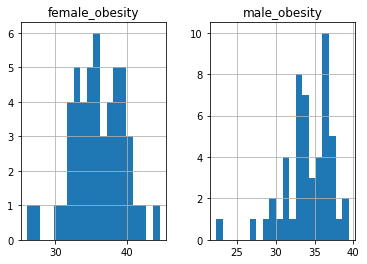

In [17]:
df_obesity.hist(bins = 20)

In [18]:
df_obesity.describe()

,male_obesity,female_obesity
count,51.000000,51.000000
mean,34.023529,35.929412
std,3.173994,3.635893
min,22.400000,26.100000
25%,32.700000,33.450000
50%,33.900000,35.900000
75%,36.300000,38.750000
max,39.400000,44.500000


From the histograms, we can see that the distributions for female obesity is almost gaussian while it is skewed to the left for the males.
The obesity prevalence is also comparatively higher for all females. The District of Columbia has the lowest male obesity while Hawaii has the lowest female 
obesity which is lower than its male obesity. Mississipi has half of its females obese and Louisiana tops in Male obesity. Note that the least obese states are actually much less obese than other states(around 3 standard deviations from 25 percentile). 

In [19]:
#Max male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmax()]

state             Louisiana
male_obesity           39.4
female_obesity         41.7
Name: 1131, dtype: object

In [20]:
#Max female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmax()]

state             Mississippi
male_obesity             39.1
female_obesity           44.5
Name: 1425, dtype: object

In [21]:
#Min male obesity
df_obesity.loc[df_obesity["male_obesity"].idxmin()]

state             District of Columbia
male_obesity                      22.4
female_obesity                    35.3
Name: 327, dtype: object

In [22]:
#Min female obesity
df_obesity.loc[df_obesity["female_obesity"].idxmin()]

state             Hawaii
male_obesity        28.4
female_obesity      26.1
Name: 557, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7c761c5f8>,
      dtype=object)

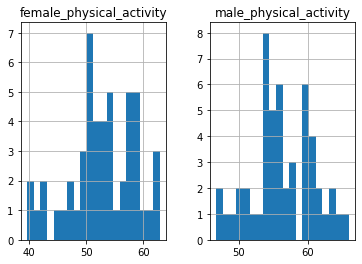

In [23]:
df_physical.hist(bins = 20)

In [24]:
df_physical.describe()

,male_physical_activity,female_physical_activity
count,51.000000,51.000000
mean,56.249020,52.794118
std,4.547191,5.802600
min,46.700000,39.700000
25%,53.700000,49.900000
50%,55.800000,52.800000
75%,59.800000,57.650000
max,66.000000,62.800000


The distributions we now get are mean centered but not
particularly gaussian. Female physical activity is comparatively lower than male physical activity(mean and median). 

In [25]:
#Max male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmax()]

state                       Hawaii
male_physical_activity          66
female_physical_activity      60.9
Name: 557, dtype: object

In [26]:
#Max female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmax()]

state                       Vermont
male_physical_activity         63.7
female_physical_activity       62.8
Name: 2851, dtype: object

In [27]:
#Min male physical activity
df_physical.loc[df_physical["male_physical_activity"].idxmin()]

state                       Tennessee
male_physical_activity           46.7
female_physical_activity         39.9
Name: 2470, dtype: object

In [28]:
#Min female physical activity
df_physical.loc[df_physical["female_physical_activity"].idxmin()]

state                       Mississippi
male_physical_activity             47.2
female_physical_activity           39.7
Name: 1425, dtype: object

Hawaii has the highest physical activity for males and really high physical activity for females too. Their low obesity and high physical activity indicate the correlation for these two features. Further, Mississippi's low physical activity levels and high obesity rates again indicate the correlation.

In [29]:
df_physical["mean_physical_activity"] = 0.5*(df_physical["male_physical_activity"] + df_physical["female_physical_activity"]) 
df_obesity["mean_obesity"] = 0.5*(df_obesity["male_obesity"] + df_obesity["female_obesity"])

For our remaining tasks , we take the mean of male and female feature values. 

In [30]:
df_physical["mean_physical_activity"].describe()

count    51.000000
mean     54.521569
std       5.120725
min      43.300000
25%      51.975000
50%      53.950000
75%      58.650000
max      63.700000
Name: mean_physical_activity, dtype: float64

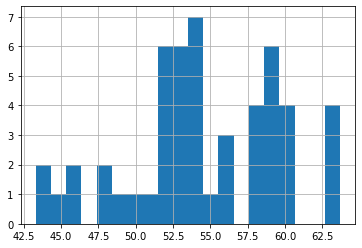

In [31]:
df_physical["mean_physical_activity"].hist(bins=20)

In [32]:
df_obesity["mean_obesity"].describe()

count    51.000000
mean     34.976471
std       3.212263
min      27.250000
25%      32.975000
50%      35.400000
75%      37.525000
max      41.800000
Name: mean_obesity, dtype: float64

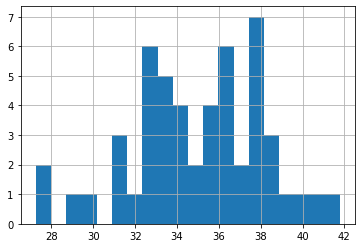

In [33]:
df_obesity["mean_obesity"].hist(bins=20)

In [34]:
#Max mean obesity
df_obesity.loc[df_obesity["mean_obesity"].idxmax()]

state             Mississippi
male_obesity             39.1
female_obesity           44.5
mean_obesity             41.8
Name: 1425, dtype: object

In [35]:
#Min mean obesity
df_obesity.loc[df_obesity["mean_obesity"].idxmin()]

state             Colorado
male_obesity          26.8
female_obesity        27.7
mean_obesity         27.25
Name: 249, dtype: object

In [36]:
#Max mean physical activity
df_physical.loc[df_physical["mean_physical_activity"].idxmax()]

state                       Colorado
male_physical_activity          64.7
female_physical_activity        62.7
mean_physical_activity          63.7
Name: 249, dtype: object

In [37]:
#Min mean physical activity
df_physical.loc[df_physical["mean_physical_activity"].idxmin()]

state                       Tennessee
male_physical_activity           46.7
female_physical_activity         39.9
mean_physical_activity           43.3
Name: 2470, dtype: object

Mississipi and Tennessee have consistently turned up in our analysis as states with high obesity and low physical activity levels indicatng the bad health conditions of its residents. However, averaging of male and female feature values has created a new contestant for the fittest state, Colorado. Note that Colorado may not boast of the best values for either males or females, however it has relatively lower and equal values for these sub-populations indicating some sort of "health"-equality.

### ***Alcohol Dataset***
This dataset is also from IHME and measures the alcohol consumption by counties for multiple years(2005-2012).
Note that we will again keep only the final year as we are interested in making an index for years after 2010.
The dataset has multiple sheets and is in xls format.

In [38]:
alcohol_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Alcohol_NATIONAL.xlsx")

In [39]:
alcohol_data_xls.sheet_names

['Overview', 'Any', 'Heavy', 'Binge', 'Prop. Heavy', 'Prop. Binge']

We pick the definitions for other sheets from the `Overview`.
1. Any :"Any" drinking is defined as at least one drink of any alcoholic bevarage in the past 30 days
2.  Heavy : "Heavy" drinking is defined as the consumption, on average, of more than one drink per day for women or two drinks per day for men in the past 30 days
3.  Binge : "Binge" drinking is defined as the consumption of more than four drinks for women or five drinks for men on a single occasion at least once in the past 30 days
4. Proportion Heavy: Proportion of All Drinkers Who Are Heavy Drinkers 
5. Proportion Binge	Proportion of All Drinkers Who Are Binge Drinkers 

Note that Any, Heavy and Binge sheets have age-standardized drinking prevalence for multiple years.
For our project, we will analyse any form of drinking prevalence so we keep the `Any` sheet only.

In [40]:
#Keeping "Any" sheet
alcohol_df = pd.read_excel(alcohol_data_xls,'Any')

In [41]:
alcohol_df.head()

,State,Location,2002 Both Sexes,2002 Females,2002 Males,2003 Both Sexes,2003 Females,2003 Males,2004 Both Sexes,2004 Females,...,2011 Males,2012 Both Sexes,2012 Females,2012 Males,"Percent Change 2002-2012, Both Sexes","Percent Change 2002-2012, Females","Percent Change 2002-2012, Males","Percent Change 2005-2012, Both Sexes","Percent Change 2005-2012, Females","Percent Change 2005-2012, Males"
0,National,United States,55.4,47.5,63.7,56.6,48.9,64.6,55.2,47.6,...,63.9,56.0,49.1,63.0,0.9,3.5,-1.0,0.0,0.9,-0.8
1,Alabama,Alabama,40.7,32.1,49.6,42.3,33.8,51.2,41.0,32.9,...,52.5,43.6,36.5,51.0,7.2,13.5,2.9,3.1,7.8,-0.1
2,Alabama,Autauga County,39.4,29.4,49.7,40.6,31.0,50.6,39.2,30.1,...,52.0,42.5,34.4,50.9,7.9,17.1,2.3,4.5,8.9,1.6
3,Alabama,Baldwin County,54.0,45.7,62.5,54.9,47.0,63.2,53.1,45.2,...,64.3,55.7,48.8,62.8,3.2,6.8,0.4,2.2,5.0,0.1
4,Alabama,Barbour County,36.0,27.3,45.0,37.9,29.2,46.9,35.8,27.4,...,48.2,37.6,29.2,46.3,4.6,7.2,3.0,0.7,1.9,-0.1


In [42]:
alcohol_df.columns

Index(['State', 'Location', '2002 Both Sexes', '2002 Females', '2002 Males',
       '2003 Both Sexes', '2003 Females', '2003 Males', '2004 Both Sexes',
       '2004 Females', '2004 Males', '2005 Both Sexes', '2005 Females',
       '2005 Males', '2006 Both Sexes', '2006 Females', '2006 Males',
       '2007 Both Sexes', '2007 Females', '2007 Males', '2008 Both Sexes',
       '2008 Females', '2008 Males', '2009 Both Sexes', '2009 Females',
       '2009 Males', '2010 Both Sexes', '2010 Females', '2010 Males',
       '2011 Both Sexes', '2011 Females', '2011 Males', '2012 Both Sexes',
       '2012 Females', '2012 Males', 'Percent Change 2002-2012, Both Sexes',
       'Percent Change 2002-2012, Females', 'Percent Change 2002-2012, Males',
       'Percent Change 2005-2012, Both Sexes',
       'Percent Change 2005-2012, Females', 'Percent Change 2005-2012, Males'],
      dtype='object')

The column of interest for us here is `2012 Both Sexes`. Since we have sex-averaged values, we don't analyse the data for males and females separately.
Further, a look at our dataframe shows that to get average values for a given state, we need `State` and `Location` column values to be same,i.e., the state 
Our next steps include keeping only the state-averages and the column of interest

In [43]:
#Keep only states
alcohol_df = alcohol_df[(alcohol_df["Location"] == alcohol_df["State"]) ].drop(columns=["Location"])

In [44]:
#Number of states is 51, so we have all the states
len(alcohol_df)

51

In [45]:
alcohol_df.head()

,State,2002 Both Sexes,2002 Females,2002 Males,2003 Both Sexes,2003 Females,2003 Males,2004 Both Sexes,2004 Females,2004 Males,...,2011 Males,2012 Both Sexes,2012 Females,2012 Males,"Percent Change 2002-2012, Both Sexes","Percent Change 2002-2012, Females","Percent Change 2002-2012, Males","Percent Change 2005-2012, Both Sexes","Percent Change 2005-2012, Females","Percent Change 2005-2012, Males"
1,Alabama,40.7,32.1,49.6,42.3,33.8,51.2,41.0,32.9,49.5,...,52.5,43.6,36.5,51.0,7.2,13.5,2.9,3.1,7.8,-0.1
69,Alaska,58.9,51.6,66.3,59.7,53.2,66.4,57.9,51.2,64.8,...,64.8,59.5,54.2,65.0,1.1,4.9,-2.0,1.9,4.2,0.0
94,Arizona,60.3,53.4,67.5,60.3,53.4,67.4,58.0,51.0,65.4,...,64.2,55.8,50.6,61.2,-7.4,-5.2,-9.3,-4.9,-2.7,-6.6
109,Arkansas,41.8,33.5,50.4,44.4,35.4,53.7,42.5,34.1,51.2,...,51.9,43.7,35.5,52.2,4.5,5.8,3.7,1.8,1.9,1.8
190,California,58.0,48.7,67.6,59.2,50.6,68.0,57.9,49.6,66.4,...,65.1,56.5,49.4,63.8,-2.6,1.4,-5.6,-3.7,-2.7,-4.4


In [46]:
#keep only column of interest and rename it to something more usable
alcohol_df = alcohol_df[["State","2012 Both Sexes"]].rename(columns = {"2012 Both Sexes" : "alcohol_prevalence"})
alcohol_df.head()

,State,alcohol_prevalence
1,Alabama,43.6
69,Alaska,59.5
94,Arizona,55.8
109,Arkansas,43.7
190,California,56.5


In [47]:
alcohol_df.describe()

,alcohol_prevalence
count,51.000000
mean,55.966667
std,8.725701
min,28.200000
25%,50.850000
50%,58.100000
75%,62.300000
max,68.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7c734dfd0>]],
      dtype=object)

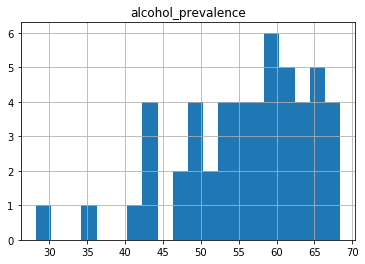

In [48]:
alcohol_df.hist(bins = 20)

Alcohol prevalence has a left skewed distribution. The distribution is does not vary much in the ranges of 55-68. However, there are a few outliers with very low alcohol prevalence. The high value of standard deviation ( 8.7) is attributed to these outliers as one can see from the high difference between the minima and the 25 percentile as compared to difference of other sets of consecutive percentiles(here, by consecutive, we mean which differ by 25%). 
Finding the max and min of this distribution can shed more light on this.

In [49]:
# Max alcohol prevalence
alcohol_df.loc[alcohol_df["alcohol_prevalence"].idxmax()]

State                 Vermont
alcohol_prevalence       68.4
Name: 2852, dtype: object

In [50]:
#Min alcohol prevalence
alcohol_df.loc[alcohol_df["alcohol_prevalence"].idxmin()]

State                 Utah
alcohol_prevalence    28.2
Name: 2835, dtype: object

In [51]:
alcohol_df.loc[alcohol_df["alcohol_prevalence"] < 40]

,State,alcohol_prevalence
2835,Utah,28.2
3077,West Virginia,35.3


In [52]:
alcohol_df.loc[alcohol_df["alcohol_prevalence"] > 65]

,State,alcohol_prevalence
305,Connecticut,65.3
318,District Of Columbia,65.1
1236,Massachusetts,65.2
1375,Minnesota,66.6
1790,New Hampshire,67.5
2852,Vermont,68.4
3153,Wisconsin,66.8


The state of Utah has an extremely low alcohol prevalence as compared to other states. West Virginia also has substantially lower values. As for the maxima, Vermont comes first but a closer analysis shows that around 6 other states have pretty similar alcohol consumptions.

### ***Diabetes Dataset***
This dataset is also from IHME for diabetes prevalence in the US by county for years 1999-2012.
We again have a xls file with multiple sheets.

In [53]:
#data loading
diabetes_data_xls = pd.ExcelFile("Data/harsh_data/IHME_county_data_Diabetes_NATIONAL.xlsx")

In [54]:
#Print sheet names
diabetes_data_xls.sheet_names

['Overview', 'Diagnosed', 'Undiagnosed', 'Total', 'Awareness', 'Control']

The description of sheet names from the `Overview` sheet --
1. Diagnosed : The proportion of adults age 20+ who report a previous diabetes diagnosis (age-standardized)
2. Undiagnosed :The proportion of adults age 20+ who do not report a previous diabetes diagnosis who have high FPG/A1C* (age-standardized)
3. Total : The proportion of adults age 20+ who report a previous diabetes diagnosis and/or have high FPG/A1C* (age-standardized)
4. Awareness : The proportion of adults age 20+ with a previous diabetes diagnosis and/or high FPG/A1C* who have received a diagnosis (age-standardized)
5. Control : The proportion of adults age 20+ with a previous diabetes diagnosis and/or high FGP/A1C* who currently do not have high FPG/A1C* (age-standardized)

*High FPG/A1C is fasting plasma glucose at least 126 mg/dL and/or A1C at least 6.5%

For our project, we will don't distinguish between diagnosed and undiagnosed cases, so we will only consider the `Total` sheet.

In [55]:
#Read total sheet
diabetes_df = pd.read_excel(diabetes_data_xls,'Total')

In [56]:
diabetes_df.head()

,Age-Standardized Total Diabetes Prevalence (%),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,10.2,9.08,11.39,10.66,9.53,11.87,11.12,9.95,...,15.22,14.02,12.73,15.39,14.28,13.02,15.62,37.1,43.5,40.04
2,Alabama,1,11.71,10.72,12.76,12.21,11.21,13.27,12.77,11.76,...,16.64,15.84,14.97,16.77,16.19,15.26,17.19,34.66,42.28,38.26
3,Autauga County,1001,11.58,10.54,12.69,12.01,10.94,13.14,12.46,11.31,...,16.19,15.25,13.92,16.67,15.45,14.03,16.97,33.7,33.1,33.42
4,Baldwin County,1003,9.71,7.9,11.64,10.11,8.26,12.08,10.57,8.69,...,14.87,13.17,11.44,15.02,13.44,11.8,15.19,30.52,49.25,38.38


There seems to a hierarchical index for column names in the excel file which `pandas.read_excel` cannot handle. But, the hierarchical column names are not necessarily required for later processing, as the top column name is `Age-Standardized Total Diabetes Prevalence (%)` which is basically the column name for all columns with diabetes prevalence, and we can set the first row as the column names. 

In [57]:
#Set first row as column names then drop that row 
diabetes_df.columns = diabetes_df.iloc[0]
diabetes_df = diabetes_df.drop(diabetes_df.index[0])

In [58]:
diabetes_df.head()

,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
1,National,NaN,10.2,9.08,11.39,10.66,9.53,11.87,11.12,9.95,...,15.22,14.02,12.73,15.39,14.28,13.02,15.62,37.1,43.5,40.04
2,Alabama,1,11.71,10.72,12.76,12.21,11.21,13.27,12.77,11.76,...,16.64,15.84,14.97,16.77,16.19,15.26,17.19,34.66,42.28,38.26
3,Autauga County,1001,11.58,10.54,12.69,12.01,10.94,13.14,12.46,11.31,...,16.19,15.25,13.92,16.67,15.45,14.03,16.97,33.7,33.1,33.42
4,Baldwin County,1003,9.71,7.9,11.64,10.11,8.26,12.08,10.57,8.69,...,14.87,13.17,11.44,15.02,13.44,11.8,15.19,30.52,49.25,38.38
5,Barbour County,1005,13.84,13.03,14.69,14.57,13.76,15.44,15.25,14.46,...,19.28,19.08,18.38,19.83,19.36,18.67,20.1,36.79,43.25,39.93


The `Location` column contains the State names, county names and National value. Note that the `FIPS` column has a 2-digit number when the location is a state. We use this fact to filter out all the states. Also, `FIPS` is null when the value is national. The column of interest for us is again the latest year,i.e., 2012 and the prevalence for both sexes. Similar to the alcohol dataset, we do not analyse the female and male values separately as we already have the average value which we need for further processing.

In [59]:
#Keep only the States
diabetes_df = diabetes_df[(diabetes_df["FIPS"].notnull()) & (diabetes_df["FIPS"]< 100)]

In [60]:
diabetes_df.head()

,Location,FIPS,"Prevalence, 1999, Both Sexes","Prevalence, 1999, Females","Prevalence, 1999, Males","Prevalence, 2000, Both Sexes","Prevalence, 2000, Females","Prevalence, 2000, Males","Prevalence, 2001, Both Sexes","Prevalence, 2001, Females",...,"Prevalence, 2010, Males","Prevalence, 2011, Both Sexes","Prevalence, 2011, Females","Prevalence, 2011, Males","Prevalence, 2012, Both Sexes","Prevalence, 2012, Females","Prevalence, 2012, Males","Percent Change, 1999-2012, Males","Percent Change, 1999-2012, Females","Percent Change, 1999-2012, Both Sexes"
2,Alabama,1,11.71,10.72,12.76,12.21,11.21,13.27,12.77,11.76,...,16.64,15.84,14.97,16.77,16.19,15.26,17.19,34.66,42.28,38.26
70,Alaska,2,9.04,8.81,9.29,9.42,9.22,9.63,9.73,9.51,...,11.78,11.81,11.84,11.78,11.89,12.04,11.74,26.38,36.58,31.51
100,Arizona,4,9.3,8.05,10.64,9.79,8.52,11.15,10.32,9,...,14.51,13.27,11.86,14.76,13.72,12.24,15.29,43.72,52.13,47.48
116,Arkansas,5,10.33,9.14,11.59,10.81,9.61,12.1,11.35,10.11,...,16.22,15.02,13.62,16.51,15.23,13.95,16.59,43.14,52.68,47.49
192,California,6,10.2,9.18,11.29,10.64,9.59,11.76,11.09,10.01,...,14.91,13.91,12.79,15.12,14.51,13.16,15.95,41.36,43.38,42.29


In [61]:
#We have all the 51 states
len(diabetes_df)

51

In [62]:
#Keep only column of interest and rename it to something more usable.
#Also rename location to State for easy merging later
diabetes_df = diabetes_df[["Location","Prevalence, 2012, Both Sexes"]]\
    .rename(columns = {"Location":"State","Prevalence, 2012, Both Sexes" : "diabetes_prevalence"})

In [63]:
diabetes_df.head()

,State,diabetes_prevalence
2,Alabama,16.19
70,Alaska,11.89
100,Arizona,13.72
116,Arkansas,15.23
192,California,14.51


In [64]:
diabetes_df.dtypes

0
State                  object
diabetes_prevalence    object
dtype: object

Our diabetes_prevalence column is of `object` datatype. This might cause problems later so we convert it to `float64`

In [65]:
#Convert datatype
diabetes_df = diabetes_df.astype({"diabetes_prevalence" : "float64"})

In [66]:
diabetes_df.describe()

,diabetes_prevalence
count,51.000000
mean,13.703529
std,1.578180
min,10.740000
25%,12.420000
50%,13.770000
75%,14.930000
max,17.550000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7c73a2cf8>]],
      dtype=object)

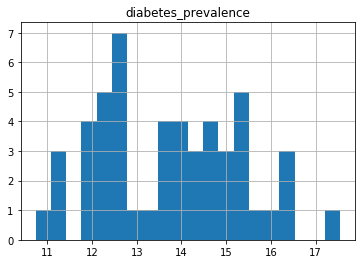

In [67]:
diabetes_df.hist(bins=20)

The distribution is right-skewed with a very small skew ( Median - mean = 0.07). There are certain large drops in the distribution near 12.8 and 15.5.

In [68]:
#Max diabetes prevalence
diabetes_df.loc[diabetes_df["diabetes_prevalence"].idxmax()]

0
State                  Mississippi
diabetes_prevalence          17.55
Name: 1427, dtype: object

In [69]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"].idxmin()]

0
State                  Vermont
diabetes_prevalence      10.74
Name: 2853, dtype: object

In [70]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"] > 16]

,State,diabetes_prevalence
2,Alabama,16.19
1133,Louisiana,16.48
1427,Mississippi,17.55
2568,Texas,16.34


In [71]:
diabetes_df.loc[diabetes_df["diabetes_prevalence"] < 11.5]

,State,diabetes_prevalence
251,Colorado,11.26
1339,Minnesota,11.27
1626,Montana,11.37
2853,Vermont,10.74


Note that Mississipi fares poorly even in terms of diabetes and it is almost 1 standard deviation higher than the state with 2nd highest diabetes prevalence.
Vermont, the minimum diabetes state, is comparatively closer to the other low diabetes states.

Now that we have analysed our datasets separately, we will merge them into a single dataframe based on the name of the State. Before this merge, to keep all state names consistent, we convert them to lower case. We perform the merge in pairs. Merging 4 dataframes to 2 and then these 2 to a single dataframe

In [72]:
#Lower state names and perform first merge on State
diabetes_df["State"] = diabetes_df["State"].apply(lambda x : x.lower())
alcohol_df["State"] = alcohol_df["State"].apply(lambda x : x.lower())
merged_df1 = pd.merge(diabetes_df,alcohol_df,on="State")

In [73]:
merged_df1.head()

,State,diabetes_prevalence,alcohol_prevalence
0,alabama,16.19,43.6
1,alaska,11.89,59.5
2,arizona,13.72,55.8
3,arkansas,15.23,43.7
4,california,14.51,56.5


In [74]:
#Merge retains all 51 states
len(merged_df1)

51

For `df_physical` and `df_obesity`, the merge is on `state` instead of `State` and only for the mean values. We rename the `state` column name to `State` for the last merge.

In [75]:
#Lower the state names and perform second merge on state
df_physical["state"] = df_physical["state"].apply(lambda x : x.lower())
df_obesity["state"] = df_obesity["state"].apply(lambda x : x.lower())
merged_df2 = pd.merge(df_physical[["state","mean_physical_activity"]],df_obesity[["state","mean_obesity"]], on="state")

In [76]:
merged_df2.head()

,state,mean_physical_activity,mean_obesity
0,alabama,45.75,39.75
1,alaska,58.70,35.70
2,arizona,58.20,33.10
3,arkansas,48.25,38.25
4,california,60.25,31.15


In [77]:
#All 51 states are retained in the merge
len(merged_df2)

51

In [78]:
#Rename state to State
merged_df2 = merged_df2.rename(columns = {"state":"State"})

In [79]:
merged_df2.head()

,State,mean_physical_activity,mean_obesity
0,alabama,45.75,39.75
1,alaska,58.70,35.70
2,arizona,58.20,33.10
3,arkansas,48.25,38.25
4,california,60.25,31.15


In [80]:
#Merge the two merged dataframes into single dataframe
merged_df = pd.merge(merged_df1,merged_df2,on="State")

In [81]:
merged_df.head()

,State,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
0,alabama,16.19,43.6,45.75,39.75
1,alaska,11.89,59.5,58.70,35.70
2,arizona,13.72,55.8,58.20,33.10
3,arkansas,15.23,43.7,48.25,38.25
4,california,14.51,56.5,60.25,31.15


In [82]:
#All states present in the merge
len(merged_df)


51

In [83]:
#No null values in our merged dataframe
merged_df.isnull().values.any()

False

In [84]:
#Correlation between features
merged_df.corr()

,diabetes_prevalence,alcohol_prevalence,mean_physical_activity,mean_obesity
diabetes_prevalence,1.000000,-0.604388,-0.749479,0.658064
alcohol_prevalence,-0.604388,1.000000,0.575229,-0.500110
mean_physical_activity,-0.749479,0.575229,1.000000,-0.837010
mean_obesity,0.658064,-0.500110,-0.837010,1.000000


As should be the case, diabetes risk increases with high alcohol prevalence, lower physical activity and higher obesity. The correlation numbers suggest this.
Obesity and physical activity are highly negatively correlated as physical activity should lower obesity. Alcohol prevalence has a negative correlation with obesity and a positive correlation with physical activity with the correlation values not very high in magnitude. The high correlation between physical activity and obesity might be responsible for this effect. Although the correlation values for alcohol are not high enough for us to suggest some statistical significance.

We now build scatter plots for every pair of features to better understand these relationships.

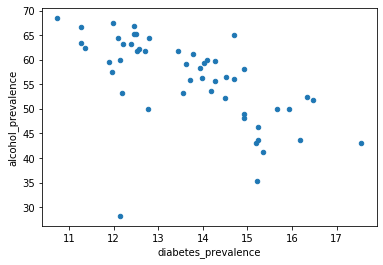

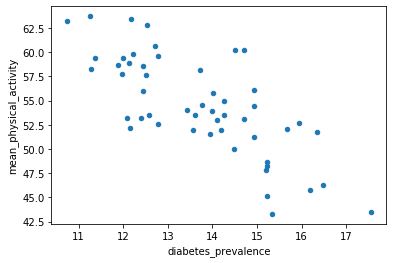

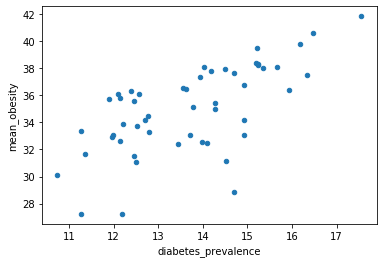

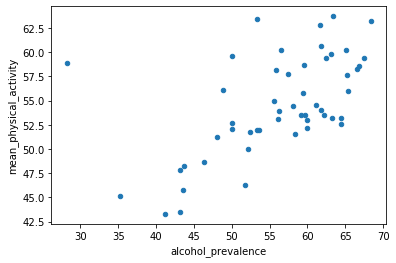

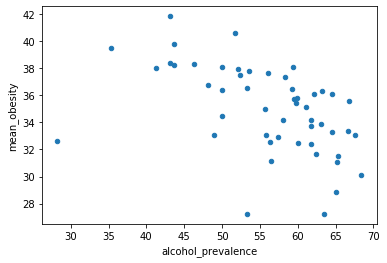

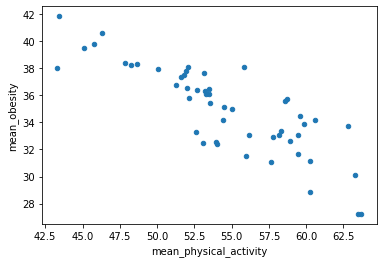

In [85]:
from itertools import combinations
#get list of column names
col_list = merged_df.columns.tolist()
#remove the state column name
col_list.remove("State")
#find all unique combinations of features 
for i,j in combinations(col_list,2):
    merged_df.plot.scatter(x = i,y=j)

As can be seen from the scatter plot, all pairs of features appear to have the same relationships as indicated by the correlation. The curious case of alcohol prevalence can also be explained. It appears to have a somewhat linear trend with physical activity and obesity but the overall correlation is poor because of outliers. The state of Utah which has the lowest alcohol prevalence lies in the middle of the distribution for the other parameters so it distorts the statistics. Even obesity and diabetes pair has a number of outliers which distort their correlation values.

In [86]:
#Save dataframe as pickle
merged_df.to_pickle("Pickles/hv_data.pickle")